## Usage

### This notebook computes the Fourier coffecients for the gray-scale images and computes the PCA
#### Change the data path as needed.

In [1]:
import numpy as np
import pickle
import os
#import download
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

########################################################################
#Filepath for the CIFAR data
# Set this before you start calling any of the functions below.
data_path = "F:\\Dropbox\\Fall 2018\\DS595\\Final Project\\InclusiveImage_Unsupervised\\cifar" 

In [2]:
########################################################################
# Various constants for the size of the images.
# Use these constants in your own program.

# Width and height of each image.
img_size = 32

# Number of channels in each image, 3 channels: Red, Green, Blue.
num_channels = 3

# Length of an image when flattened to a 1-dim array.
img_size_flat = img_size * img_size * num_channels

# Number of classes.
num_classes = 10

########################################################################
# Various constants used to allocate arrays of the correct size.

# Number of files for the training-set.
_num_files_train = 5

# Number of images for each batch-file in the training-set.
_images_per_file = 10000

# Total number of images in the training-set.
# This is used to pre-allocate arrays for efficiency.
_num_images_train = _num_files_train * _images_per_file

########################################################################
# Private functions for downloading, unpacking and loading data-files.


def _get_file_path(filename=""):
    """
    Return the full path of a data-file for the data-set.
    If filename=="" then return the directory of the files.
    """

    return os.path.join(data_path,  filename)


def _unpickle(filename):
    """
    Unpickle the given file and return the data.
    Note that the appropriate dir-name is prepended the filename.
    """

    # Create full path for the file.
    file_path = _get_file_path(filename)

    print("Loading data: " + file_path)

    with open(file_path, mode='rb') as file:
        # In Python 3.X it is important to set the encoding,
        # otherwise an exception is raised here.
        data = pickle.load(file, encoding='bytes')

    return data


def _convert_images(raw):
    """
    Convert images from the CIFAR-10 format and
    return a 4-dim array with shape: [image_number, height, width, channel]
    where the pixels are floats between 0.0 and 1.0.
    """

    # Convert the raw images from the data-files to floating-points.
    raw_float = np.array(raw, dtype=float) / 255.0

    # Reshape the array to 4-dimensions.
    images = raw_float.reshape([-1, num_channels, img_size, img_size])

    # Reorder the indices of the array.
    images = images.transpose([0, 2, 3, 1])

    return images


def _load_data(filename):
    """
    Load a pickled data-file from the CIFAR-10 data-set
    and return the converted images (see above) and the class-number
    for each image.
    """

    # Load the pickled data-file.
    data = _unpickle(filename)

    # Get the raw images.
    raw_images = data[b'data']

    # Get the class-numbers for each image. Convert to numpy-array.
    cls = np.array(data[b'labels'])

    # Convert the images.
    images = _convert_images(raw_images)

    return images, cls


########################################################################
# Public functions that you may call to download the data-set from
# the internet and load the data into memory.


def load_class_names():
    """
    Load the names for the classes in the CIFAR-10 data-set.
    Returns a list with the names. Example: names[3] is the name
    associated with class-number 3.
    """

    # Load the class-names from the pickled file.
    raw = _unpickle(filename="batches.meta")[b'label_names']

    # Convert from binary strings.
    names = [x.decode('utf-8') for x in raw]

    return names


def load_training_data():
    """
    Load all the training-data for the CIFAR-10 data-set.
    The data-set is split into 5 data-files which are merged here.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    # Pre-allocate the arrays for the images and class-numbers for efficiency.
    images = np.zeros(shape=[_num_images_train, img_size, img_size, num_channels], dtype=float)
    cls = np.zeros(shape=[_num_images_train], dtype=int)

    # Begin-index for the current batch.
    begin = 0

    # For each data-file.
    for i in range(_num_files_train):
        # Load the images and class-numbers from the data-file.
        images_batch, cls_batch = _load_data(filename="data_batch_" + str(i + 1))

        # Number of images in this batch.
        num_images = len(images_batch)

        # End-index for the current batch.
        end = begin + num_images

        # Store the images into the array.
        images[begin:end, :] = images_batch

        # Store the class-numbers into the array.
        cls[begin:end] = cls_batch

        # The begin-index for the next batch is the current end-index.
        begin = end

    return images, cls


def load_test_data():
    """
    Load all the test-data for the CIFAR-10 data-set.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    images, cls = _load_data(filename="test_batch")

    return images, cls

In [4]:
########################################################################
#Import image data using import functions     
raw_images, cls=load_training_data()


Loading data: F:\Dropbox\Fall 2018\DS595\Final Project\InclusiveImage_Unsupervised\cifar\data_batch_1
Loading data: F:\Dropbox\Fall 2018\DS595\Final Project\InclusiveImage_Unsupervised\cifar\data_batch_2
Loading data: F:\Dropbox\Fall 2018\DS595\Final Project\InclusiveImage_Unsupervised\cifar\data_batch_3
Loading data: F:\Dropbox\Fall 2018\DS595\Final Project\InclusiveImage_Unsupervised\cifar\data_batch_4
Loading data: F:\Dropbox\Fall 2018\DS595\Final Project\InclusiveImage_Unsupervised\cifar\data_batch_5


In [22]:
imgdata = raw_images
print(imgdata.shape)
grayscale = np.zeros([50000,32,32])
fourier_images = np.zeros([50000,32,32])
for i in range(50000):
    grayscale[i,:,:] = 0.21*imgdata[i,:,:,1] + 0.72*imgdata[i,:,:,1] + 0.07*imgdata[i,:,:,1]

(50000, 32, 32, 3)


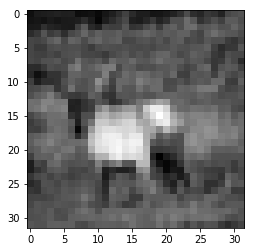

In [23]:
import matplotlib.pyplot as plt
import pylab
% matplotlib inline
pylab.imshow(grayscale[3,:,:], cmap = plt.get_cmap('gray'))
pylab.show()

In [24]:
# Take the 2-dimensional DFT and centre the frequencies
for i in range(50000):
    fourier_images[i,:,:] = np.fft.fft2(grayscale[i,:,:])
    fourier_images[i,:,:] = np.fft.fftshift(fourier_images[i,:,:])
    fourier_images[i,:,:] = np.abs(fourier_images[i,:,:])

C:\Users\kpvedula\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


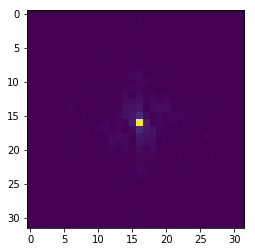

In [26]:
pylab.imshow(fourier_images[3,:,:])
pylab.show()

In [27]:
fourier_images.shape

(50000, 32, 32)

In [29]:
fourier_images_flat=raw_images.ravel()
print(fourier_images_flat.shape)

(153600000,)


In [30]:
#RUN PCA on images
# Length of an image when flattened to a 1-dim array.
img_size_flat = 32*32
fourier_images_for_PCA = fourier_images_flat.reshape(-1, img_size_flat)
pca = PCA(n_components=img_size_flat)
pca.fit(fourier_images_for_PCA)

PCA(copy=True, iterated_power='auto', n_components=1024, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
#PRINT Explained Variance Ratio
print('\n Explained Variance')
print(pca.explained_variance_ratio_) 
print('\nSingular Values')
print(pca.singular_values_) 
print('\nCumulative Explained Variance')
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)


 Explained Variance
[4.14914303e-01 7.89918357e-02 7.26683692e-02 ... 3.03088876e-07
 2.81785231e-07 2.73724526e-07]

Singular Values
[2.00661206e+03 8.75538642e+02 8.39763361e+02 ... 1.71502010e+00
 1.65364899e+00 1.62982536e+00]

Cumulative Explained Variance
[41.49 49.39 56.66 ... 99.41 99.41 99.41]


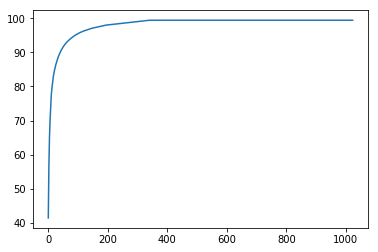

In [32]:
plt.plot(var1)